# Task 1: Import package and Load data

In [170]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [106]:
path = '/Users/tranphucloi/Desktop/DA-python/data/Sales-Reporting-main/data/'
dataframe = pd.read_csv(path + 'sales2019_3.csv')
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


# Task 2: Clearn and Preprocess data

## Task 2.1: Merge 12-month data

In [115]:
frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file 
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)
        
df = result
df.to_csv('annualSales2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [117]:
print(sum(all_length))

186850


## Task 2.2: Add 'Month' colum

In [123]:
df['Month'] = df['Order Date'].str[0:2]

In [125]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [127]:
print(set(df['Month']))

{nan, 'Or', '08', '03', '10', '01', '06', '07', '04', '11', '09', '12', '05', '02'}


## Task 2.3: Get rid of 'NaN' and 'Or' value

In [129]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [130]:
print(set(df['Month']))

{'08', 'Or', '03', '10', '01', '06', '07', '04', '11', '09', '12', '05', '02'}


In [132]:
df = df[df['Month']!= 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [133]:
print(set(df['Month']))

{'08', '03', '10', '01', '06', '07', '04', '11', '09', '12', '05', '02'}


# Task 3: Reporting

## Task 3.1: What was the best month for sales? How much was earned that month?

In [134]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


In [138]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')

In [140]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

int8
float32


In [146]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.000000
1,162009,Lightning Charging Cable,1,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.950000
2,162009,Wired Headphones,2,11.990000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.980000
3,162010,Bose SoundSport Headphones,1,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.989998
4,162011,34in Ultrawide Monitor,1,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.989990


In [149]:
moving_column = df.pop('Sales')
df.insert(4,'Sales', moving_column)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03
...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.989998,99.989998,08/29/19 22:19,"868 Hickory St, San Francisco, CA 94016",08
12007,248147,AAA Batteries (4-pack),3,2.990000,8.970000,08/31/19 16:26,"206 Lakeview St, Boston, MA 02215",08
12008,248148,AA Batteries (4-pack),1,3.840000,3.840000,08/02/19 07:25,"568 13th St, Seattle, WA 98101",08
12009,248149,USB-C Charging Cable,1,11.950000,11.950000,08/08/19 12:10,"495 Walnut St, San Francisco, CA 94016",08


In [150]:
df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [155]:
sales_value = df.groupby('Month').sum()['Sales']
sales_value.max()

4613443.5

<function matplotlib.pyplot.show(close=None, block=None)>

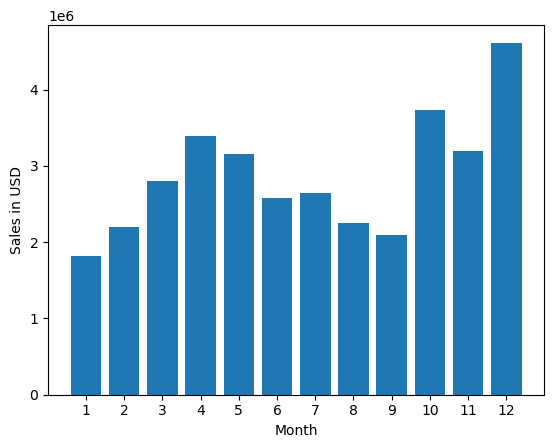

In [172]:
months = range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show

## Task 3.2: What city has the best sales?

In [174]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [176]:
address_to_city = lambda address: address.split(',')[1]

In [179]:
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [180]:
df.groupby('City').sum()['Sales']

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [184]:
sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city.max()                                          

8262204.0

In [190]:
cities = [city for city, sales in sales_value_city.items()]

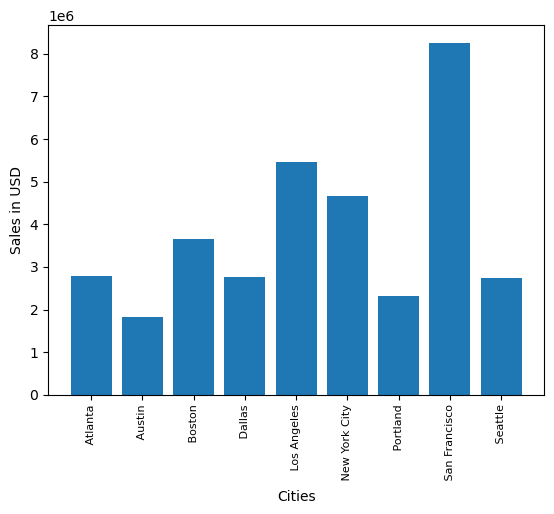

In [194]:
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

## Task 3.3: What time should we display ads to minimize the likelihook of custumer's byong product?

In [195]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700.000000,700.000000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.950000,14.950000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.990000,23.980000,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [197]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df['Order Date'].dtypes)

datetime64[ns]


In [198]:
df['Hours'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0
...,...,...,...,...,...,...,...,...,...,...
12006,248146,Bose SoundSport Headphones,1,99.989998,99.989998,2019-08-29 22:19:00,"868 Hickory St, San Francisco, CA 94016",08,San Francisco,22
12007,248147,AAA Batteries (4-pack),3,2.990000,8.970000,2019-08-31 16:26:00,"206 Lakeview St, Boston, MA 02215",08,Boston,16
12008,248148,AA Batteries (4-pack),1,3.840000,3.840000,2019-08-02 07:25:00,"568 13th St, Seattle, WA 98101",08,Seattle,7
12009,248149,USB-C Charging Cable,1,11.950000,11.950000,2019-08-08 12:10:00,"495 Walnut St, San Francisco, CA 94016",08,San Francisco,12


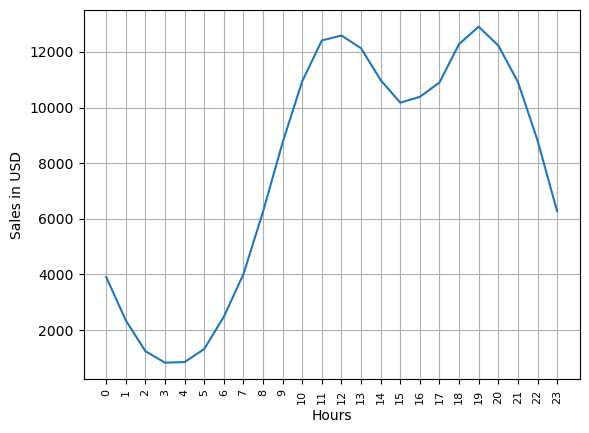

In [206]:
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

## Task 3.4: What products are most often sold together?

In [208]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [236]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2


In [234]:
groupProduct = lambda product: ', '.join(product)

In [237]:
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

/var/folders/30/gs2fwsk548jgfc4rs9r7pptc0000gn/T/ipykernel_19497/1322959905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,iPhone,1,700.00,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",03,Los Angeles,2,"iPhone, Lightning Charging Cable"


In [239]:
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup

,Order ID,All Products
0,162009,"iPhone, Lightning Charging Cable, Wired Headph..."
30,162037,"iPhone, Lightning Charging Cable"
60,162066,"AA Batteries (4-pack), USB-C Charging Cable"
66,162071,"Vareebadd Phone, USB-C Charging Cable"
78,162082,"Vareebadd Phone, Wired Headphones"
...,...,...
11908,248053,"AA Batteries (4-pack), 20in Monitor"
11924,248068,"Bose SoundSport Headphones, AA Batteries (4-pack)"
11945,248088,"ThinkPad Laptop, Bose SoundSport Headphones"
11963,248105,"Google Phone, Wired Headphones"


In [242]:
df_dup['All Products'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

## Task 3.5: What product sold the most? Why do you think it sold the most?


In [244]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,162009,iPhone,1,700.000000,700.000000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
1,162009,Lightning Charging Cable,1,14.950000,14.950000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
2,162009,Wired Headphones,2,11.990000,23.980000,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",03,Austin,20
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",03,San Francisco,5
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",03,San Francisco,0


In [253]:
all_product = df.groupby('Product').sum()['Quantity Ordered']
all_product

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

In [254]:
prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

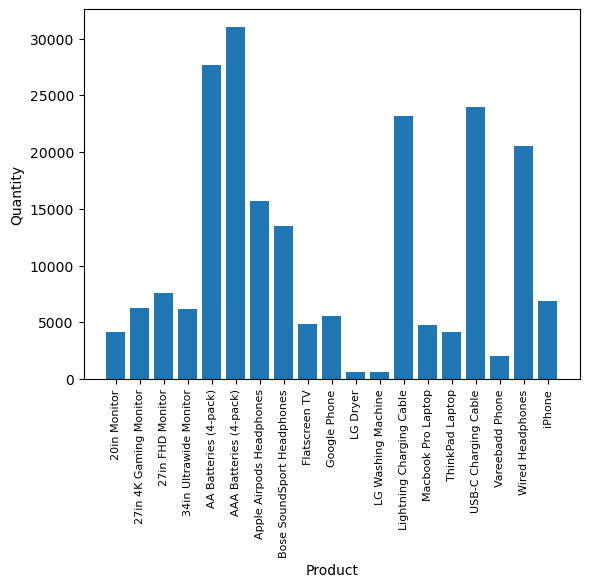

In [255]:
products_ls = [product for product, quant in all_product.items()]
plt.bar(products_ls, all_product)
plt.xticks(products_ls, rotation=90, size=8)
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.show()

/var/folders/30/gs2fwsk548jgfc4rs9r7pptc0000gn/T/ipykernel_19497/2650522907.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


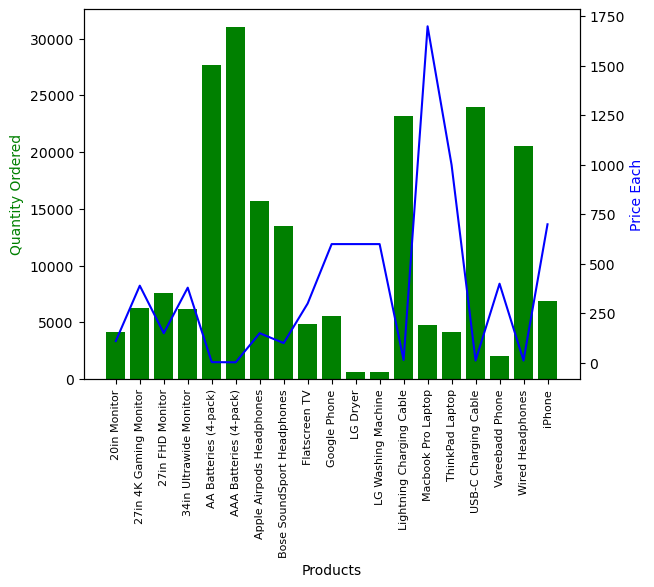

In [257]:
x = products_ls
y1 = all_product
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()